In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from tqdm import tqdm
import torch

In [8]:
arxiv = pd.read_json("arxiv_all_data.json", lines=True, nrows=1000000)
arxiv[["title", "abstract"]].to_csv("arxiv_first_1m.csv")

In [9]:
arxiv = pd.read_json("arxiv_all_data.json", lines=True, nrows=100000)
arxiv[["title", "abstract"]].to_csv("arxiv_first_100k.csv")

In [3]:
arxiv[:5]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [3]:
chunks = []
for chunk in tqdm(pd.read_json("arxiv_all_data.json", lines=True, chunksize=100000)):
    chunks.append(chunk[["title", "abstract"]])

23it [00:54,  2.37s/it]


In [4]:
arxiv_all = pd.concat(chunks)
print(arxiv_all.shape)

(2258347, 2)


In [6]:
arxiv_all.to_csv("arxiv_all.csv")

In [ ]:
arxiv_first_100k = pd.read_csv("arxiv_first_100k.csv")

In [11]:
tokenizer = AutoTokenizer.from_pretrained('intfloat/e5-base-v2')
title_batch_dict = tokenizer(arxiv_first_100k["title"].tolist(), max_length=512, padding=True, truncation=True, return_tensors='pt')

In [35]:
abstract_batch_dict = tokenizer(arxiv_first_100k["abstract"].tolist(), max_length=512, padding=True, truncation=True, return_tensors='pt')

In [13]:
arxiv_all = pd.read_csv("arxiv_all.csv")

In [33]:
title_token_occurrences = torch.sum(title_batch_dict["attention_mask"], dim=1).numpy()

In [42]:
np.sum(np.logical_and(title_token_occurrences > 5, title_token_occurrences < 30))

94594

min: 3, max: 103, mean: 17.05658, median: 16.0


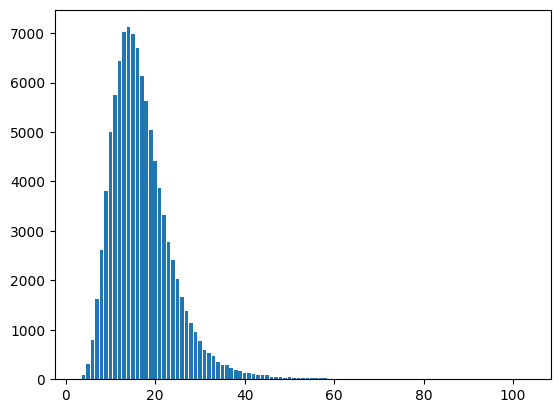

In [34]:
print(f'min: {np.min(title_token_occurrences)}, max: {np.max(title_token_occurrences)}, mean: {np.mean(title_token_occurrences)}, median: {np.median(title_token_occurrences)}')
token_occurrences_dict = {}
for token_occurrence in title_token_occurrences:
    cluster_size = 1
    token_occurrence //= cluster_size
    token_occurrence *= cluster_size
    if token_occurrence in token_occurrences_dict:
        token_occurrences_dict[token_occurrence] += 1
    else:
        token_occurrences_dict[token_occurrence] = 1
sorted_by_key = sorted(token_occurrences_dict.items(), key=lambda x: x[0])
keys_sorted = [key for key, _ in sorted_by_key]
values_sorted_by_key = [val for _, val in sorted_by_key]
plt.bar(keys_sorted, values_sorted_by_key)
plt.show()

In [36]:
abstract_token_occurrences = torch.sum(abstract_batch_dict["attention_mask"], dim=1).numpy()

In [45]:
np.sum(np.logical_and(abstract_token_occurrences > 100, abstract_token_occurrences < 250))

58685

min: 5, max: 512, mean: 177.19479, median: 158.0


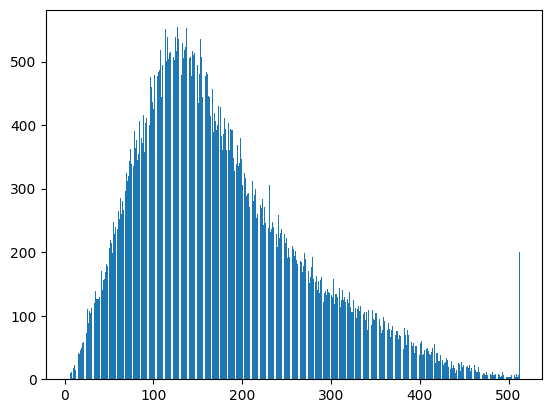

In [37]:
print(f'min: {np.min(abstract_token_occurrences)}, max: {np.max(abstract_token_occurrences)}, mean: {np.mean(abstract_token_occurrences)}, median: {np.median(abstract_token_occurrences)}')
token_occurrences_dict = {}
for token_occurrence in abstract_token_occurrences:
    cluster_size = 1
    token_occurrence //= cluster_size
    token_occurrence *= cluster_size
    if token_occurrence in token_occurrences_dict:
        token_occurrences_dict[token_occurrence] += 1
    else:
        token_occurrences_dict[token_occurrence] = 1
sorted_by_key = sorted(token_occurrences_dict.items(), key=lambda x: x[0])
keys_sorted = [key for key, _ in sorted_by_key]
values_sorted_by_key = [val for _, val in sorted_by_key]
plt.bar(keys_sorted, values_sorted_by_key)
plt.show()

In [50]:
np.sum(np.logical_and(np.logical_and(title_token_occurrences > 10, title_token_occurrences < 30), np.logical_and(abstract_token_occurrences > 100, abstract_token_occurrences < 250)))

43915